In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Importing the csv files and doing some data cleaning

In [2]:
pd.set_option("display.max_rows", None)
global_data = pd.read_csv('WHO COVID-19 global table data September 2nd 2021 at 2.32.54 PM.csv')
global_data

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,217558771,2791.168702,4455323,57.159535,527942,4517240,57.953898,66630,0.854829,7308,NaN
United States of America,Americas,38923013,11759.120000,1106774,334.370000,120560,634320,191.640000,9274,2.800000,744,NaN
India,South-East Asia,32810845,2377.590000,298479,21.630000,41965,439020,31.810000,3262,0.240000,460,NaN
Brazil,Americas,20752281,9763.050000,168287,79.170000,10466,579574,272.660000,4726,2.220000,266,NaN
Russian Federation,Europe,6937333,4753.730000,132423,90.740000,18368,184014,126.090000,5591,3.830000,790,NaN
The United Kingdom,Europe,6789585,10001.450000,234381,345.260000,31931,132535,195.230000,681,1.000000,50,NaN
France,Europe,6574138,10107.940000,103767,159.540000,17441,112821,173.470000,483,0.740000,174,NaN
Turkey,Europe,6388331,7574.580000,134620,159.620000,21893,56710,67.240000,1715,2.030000,252,NaN
Argentina,Americas,5178889,11458.790000,38923,86.120000,5358,111607,246.940000,998,2.210000,224,NaN
Iran (Islamic Republic of),Eastern Mediterranean,4992063,5943.430000,235669,280.580000,31319,107794,128.340000,4437,5.280000,643,NaN


In [3]:
#dropping unnecessary tables and renaming the columns shifted when creating the data frame
global_data_new = global_data.filter(['WHO Region',
                                      'Cases - newly reported in last 24 hours' ], 
                                     axis=1)
global_data_new

,WHO Region,Cases - newly reported in last 24 hours
Global,217558771,4517240
United States of America,38923013,634320
India,32810845,439020
Brazil,20752281,579574
Russian Federation,6937333,184014
The United Kingdom,6789585,132535
France,6574138,112821
Turkey,6388331,56710
Argentina,5178889,111607
Iran (Islamic Republic of),4992063,107794


In [4]:
#renaming the columns shifted when creating the data frame
global_data_final = global_data_new.rename(columns={'WHO Region': 'Cumulative Cases', 
                                           'Cases - newly reported in last 24 hours':'Cumulative Deaths'})
global_data_final

,Cumulative Cases,Cumulative Deaths
Global,217558771,4517240
United States of America,38923013,634320
India,32810845,439020
Brazil,20752281,579574
Russian Federation,6937333,184014
The United Kingdom,6789585,132535
France,6574138,112821
Turkey,6388331,56710
Argentina,5178889,111607
Iran (Islamic Republic of),4992063,107794


In [5]:
#deleting rows that have recorded zero cases  
global_data_final_2 = global_data_final[(global_data_final.T != 0).any()]
global_data_final_2

,Cumulative Cases,Cumulative Deaths
Global,217558771,4517240
United States of America,38923013,634320
India,32810845,439020
Brazil,20752281,579574
Russian Federation,6937333,184014
The United Kingdom,6789585,132535
France,6574138,112821
Turkey,6388331,56710
Argentina,5178889,111607
Iran (Islamic Republic of),4992063,107794


In [6]:
#removing the Global row 
global_data_final_2 = global_data_final_2.drop(labels = 'Global', axis=0)
global_data_final_2

,Cumulative Cases,Cumulative Deaths
United States of America,38923013,634320
India,32810845,439020
Brazil,20752281,579574
Russian Federation,6937333,184014
The United Kingdom,6789585,132535
France,6574138,112821
Turkey,6388331,56710
Argentina,5178889,111607
Iran (Islamic Republic of),4992063,107794
Colombia,4907264,124883


In [7]:
#Sorting the dataframe alphabetically by index
global_data_final_2 = global_data_final_2.sort_index()
global_data_final_2

,Cumulative Cases,Cumulative Deaths
Afghanistan,153260,7123
Albania,146387,2498
Algeria,196080,5269
Andorra,15033,130
Angola,47544,1217
Anguilla,217,0
Antigua and Barbuda,1715,44
Argentina,5178889,111607
Armenia,242750,4857
Aruba,14508,139


In [8]:
#Adding a new calulated column 'Death Rate'
global_data_final_2['Death Rate'] = global_data_final_2['Cumulative Deaths']/global_data_final_2['Cumulative Cases']

global_data_final_2

,Cumulative Cases,Cumulative Deaths,Death Rate
Afghanistan,153260,7123,0.046477
Albania,146387,2498,0.017064
Algeria,196080,5269,0.026872
Andorra,15033,130,0.008648
Angola,47544,1217,0.025597
Anguilla,217,0,0.000000
Antigua and Barbuda,1715,44,0.025656
Argentina,5178889,111607,0.021550
Armenia,242750,4857,0.020008
Aruba,14508,139,0.009581


In [9]:
#Resting the index
global_data_final_2.reset_index(inplace=True)

In [10]:
global_data_final_2


,index,Cumulative Cases,Cumulative Deaths,Death Rate
0,Afghanistan,153260,7123,0.046477
1,Albania,146387,2498,0.017064
2,Algeria,196080,5269,0.026872
3,Andorra,15033,130,0.008648
4,Angola,47544,1217,0.025597
5,Anguilla,217,0,0.000000
6,Antigua and Barbuda,1715,44,0.025656
7,Argentina,5178889,111607,0.021550
8,Armenia,242750,4857,0.020008
9,Aruba,14508,139,0.009581


In [11]:
#remaning column
global_data_final_2 = global_data_final_2.rename(columns={'index':'Country'})
global_data_final_2

,Country,Cumulative Cases,Cumulative Deaths,Death Rate
0,Afghanistan,153260,7123,0.046477
1,Albania,146387,2498,0.017064
2,Algeria,196080,5269,0.026872
3,Andorra,15033,130,0.008648
4,Angola,47544,1217,0.025597
5,Anguilla,217,0,0.000000
6,Antigua and Barbuda,1715,44,0.025656
7,Argentina,5178889,111607,0.021550
8,Armenia,242750,4857,0.020008
9,Aruba,14508,139,0.009581


In [12]:
vaccination_data = pd.read_csv('vaccination-data.csv')
vaccination_data

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,1.201286e+06,770542.0,3.086,1.979,430744.0,1.107,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,OWID,2021-08-27,1.427977e+06,812555.0,49.620,28.235,615422.0,21.385,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.0
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,4.146091e+06,3421279.0,9.455,7.802,724812.0,1.653,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",2021-01-30,3.0
3,American Samoa,ASM,WPRO,REPORTING,2021-08-20,5.442500e+04,29993.0,98.601,54.338,24977.0,45.251,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",2020-12-21,3.0
4,Andorra,AND,EURO,OWID,2021-08-15,9.166000e+04,51044.0,118.631,66.064,40616.0,52.567,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.0
5,Angola,AGO,AFRO,REPORTING,2021-08-23,1.869933e+06,1025212.0,5.690,3.119,844721.0,2.570,SII - Covishield,2021-03-10,1.0
6,Anguilla,AIA,AMRO,REPORTING,2021-08-27,1.845800e+04,9493.0,123.037,63.278,8965.0,59.759,AstraZeneca - Vaxzevria,2021-02-05,1.0
7,Antigua and Barbuda,ATG,AMRO,REPORTING,2021-08-27,7.290200e+04,39808.0,74.444,40.650,33094.0,33.794,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-19,5.0
8,Argentina,ARG,AMRO,REPORTING,2021-08-27,4.096119e+07,27606176.0,90.631,61.081,13355013.0,29.549,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2020-12-29,5.0
9,Armenia,ARM,EURO,OWID,2021-08-22,2.393420e+05,153888.0,8.077,5.193,85454.0,2.884,"AstraZeneca - AZD1222, Sinovac - CoronaVac, Ga...",NaN,3.0


In [13]:
#Removig unncessary columns
vaccination_data_cleaned = vaccination_data.filter(['COUNTRY',
                                                    'PERSONS_FULLY_VACCINATED_PER100'], 
                                                   axis=1)
vaccination_data_cleaned

,COUNTRY,PERSONS_FULLY_VACCINATED_PER100
0,Afghanistan,1.107
1,Albania,21.385
2,Algeria,1.653
3,American Samoa,45.251
4,Andorra,52.567
5,Angola,2.570
6,Anguilla,59.759
7,Antigua and Barbuda,33.794
8,Argentina,29.549
9,Armenia,2.884


In [14]:
#renaming columns
vaccination_data_cleaned = vaccination_data_cleaned.rename(columns={'COUNTRY':'Country', 
                                                                    'PERSONS_FULLY_VACCINATED_PER100':'Fully Vaccinated per 100'})
vaccination_data_cleaned

,Country,Fully Vaccinated per 100
0,Afghanistan,1.107
1,Albania,21.385
2,Algeria,1.653
3,American Samoa,45.251
4,Andorra,52.567
5,Angola,2.570
6,Anguilla,59.759
7,Antigua and Barbuda,33.794
8,Argentina,29.549
9,Armenia,2.884


In [15]:
#merging the two dataframes 
global_cases_deaths_vax = pd.merge(left=global_data_final_2, 
                                   right=vaccination_data_cleaned, 
                                   left_on='Country', 
                                   right_on='Country')

global_cases_deaths_vax

,Country,Cumulative Cases,Cumulative Deaths,Death Rate,Fully Vaccinated per 100
0,Afghanistan,153260,7123,0.046477,1.107
1,Albania,146387,2498,0.017064,21.385
2,Algeria,196080,5269,0.026872,1.653
3,Andorra,15033,130,0.008648,52.567
4,Angola,47544,1217,0.025597,2.570
5,Anguilla,217,0,0.000000,59.759
6,Antigua and Barbuda,1715,44,0.025656,33.794
7,Argentina,5178889,111607,0.021550,29.549
8,Armenia,242750,4857,0.020008,2.884
9,Aruba,14508,139,0.009581,64.595


In [16]:
#Checkin if there are Null values
global_cases_deaths_vax.isnull().values.any()

True

In [17]:
#Removing rows with null values so as to work with a complete dataframe
global_cases_deaths_vax = global_cases_deaths_vax.dropna(how = 'any', axis = 0)
global_cases_deaths_vax

,Country,Cumulative Cases,Cumulative Deaths,Death Rate,Fully Vaccinated per 100
0,Afghanistan,153260,7123,0.046477,1.107
1,Albania,146387,2498,0.017064,21.385
2,Algeria,196080,5269,0.026872,1.653
3,Andorra,15033,130,0.008648,52.567
4,Angola,47544,1217,0.025597,2.570
5,Anguilla,217,0,0.000000,59.759
6,Antigua and Barbuda,1715,44,0.025656,33.794
7,Argentina,5178889,111607,0.021550,29.549
8,Armenia,242750,4857,0.020008,2.884
9,Aruba,14508,139,0.009581,64.595


In [18]:
global_cases_deaths_vax.isnull().values.any()

False

# Hypothesis testing Using the Pearson Correlation


**What is Pearson Correlation

This is a measure of linear correlation between two data sets.

Its the ration between covariance of two variables and the product of their standard deviation.

Stating the Null and Alternative Hypothesis

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rate do lead to lower death rates

In [19]:
vax_data = list(global_cases_deaths_vax['Fully Vaccinated per 100'])
death_data = list(global_cases_deaths_vax['Death Rate'])

In [20]:
#Testing at the 95% confidence interval and at the 99% confidence interval
stat, p = pearsonr(vax_data, death_data)
print('stat=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Probably the two data samples are independent')
else:
    print('Probably the two data samples are dependent')
    

if p > 0.01:
    print('Probably the two data samples are independent')
else:
    print('Probably the two data samples are dependent')

stat=-0.28877, p=0.00003
Probably the two data samples are dependent
Probably the two data samples are dependent


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore we are both 95% and 99% confident that there is reasonable evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities are likely to occur.

# Hypothesis testing Using the Chi-Square test

**What is Chi Square test

A chi-square tests the goodness of fit and determines if sample data matches a population.

Stating the Null and Alternative Hypothesis

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rate do lead to lower death rates

In [21]:
Table = [vax_data,death_data]

In [22]:
stat, p, dof, expected = chi2_contingency(Table)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably the two data samples are independent')
else:
    print('Probably the two data samples are dependent')
    
    
if p > 0.01:
    print('Probably the two data samples are independent')
else:
    print('Probably the two data samples are dependent')

stat=365.493, p=0.000
Probably the two data samples are dependent
Probably the two data samples are dependent


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore we are both 95% and 99% confident that there is reasonable evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities are likely to occur.

# Visual illustration of the correlation

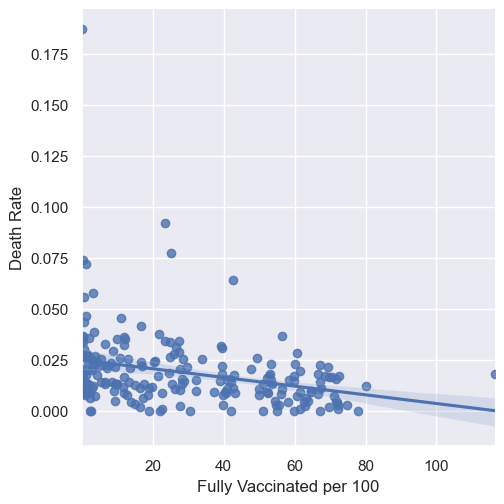

<Figure size 2000x1500 with 0 Axes>

In [23]:
sns.lmplot(x = 'Fully Vaccinated per 100', y = 'Death Rate', data = global_cases_deaths_vax)
plt.figure(figsize = (20,15))
plt.show()

(2.5, -0.5)

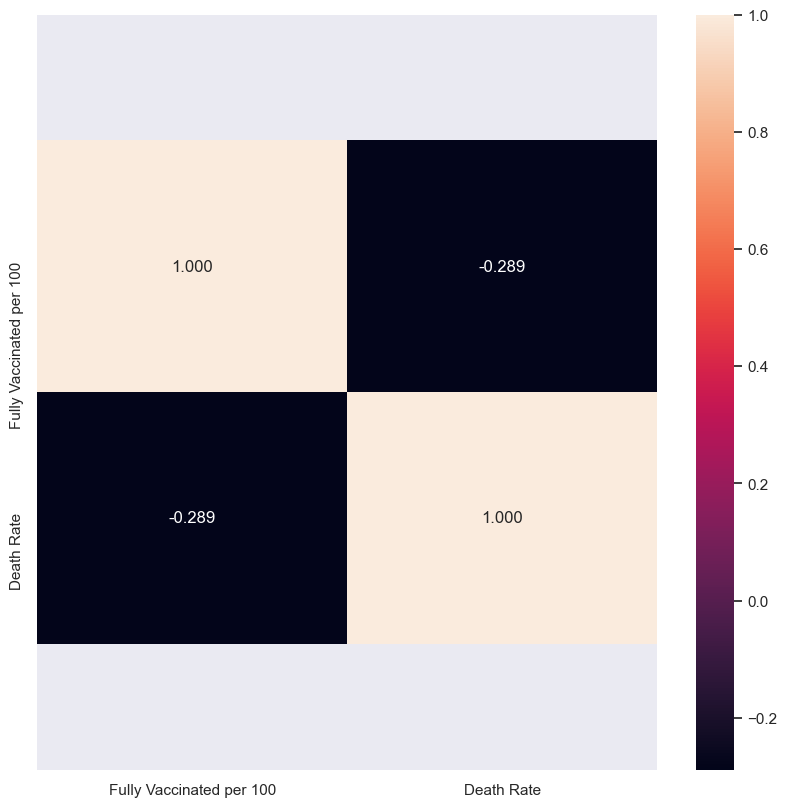

In [24]:
#Correlation using heatmap
global_cases_deaths_vax_2 = global_cases_deaths_vax[['Fully Vaccinated per 100', 'Death Rate']]


plt.figure(figsize = (10,10))
ax = sns.heatmap(global_cases_deaths_vax_2.corr(), annot = True, fmt = '.3f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)